# Project: Investigate TMDb Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the TMDb movie data set for this project. This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I would like to find meaningful and interesting patterns in the dataset.

### Questions to answer
>   
   1. Which genres are the most popular from year to year?
   2. Which movies have the highest and lowest net profit?
   3. Which movies have the highest and lowest budget?    
   4. Which movies had voted by the highest and the lowest count of people?   
   5. Which genres are the most popular?                     
   6. What is the correlation between popularity and vote count columns?                    
   7. Which genres have high budget and revenue?
   8. What is the correlation between revenue and budget?
   9. Which genres have the highest runtime duration?
   10. Which directors earned the highest revenue?
   11. What is the correlation between all numeric values in data frame?

In [1]:
#import statements for all of the packages that I plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Load data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


There are some information in the dataset like movie name, budget, revenue, directors and cast etc. Also there are some columns, like **cast**, **genres** and **production_companies**, contain multiple values separates by pipe **(|)** characters.

In [3]:
#Find count of rows and columns
row, col = df.shape

print('There are {} total entries of movies and {} columns.'.format(row-1, col) )

There are 10865 total entries of movies and 21 columns.


In [4]:
#see information and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are some null values in the **cast**, **director**, **overview** and **genres** columns. But some columns have lots of missing values like **homepage**, **tagline**, **keywords** and **production_companies**. Especially the **homepage** and **tagline** columns are not necessary for answering the questions, so I decided to drop both of the columns. 

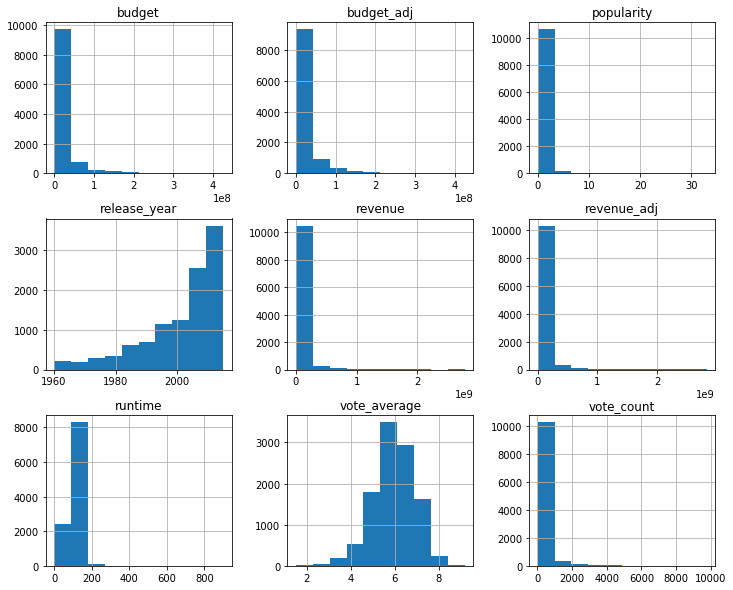

In [5]:
#Creating histograms 
df.drop(['id'], axis=1).hist(figsize=(12,10));

In [6]:
#some summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are some columns contain many zeros(0). In order to start a analysis process, the columns "budget", "revenue", "budget_adj", "revenue_adj" and "runtime". I will drop columns that I will not use for my analysis. Afterward, I will replace "0" values into "nan" in those columns.

In [7]:
#find number of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#find total budget=0 value count
budget_zero_count = sum(df['budget'] == 0)

print('There are {} total rows\' budget are equal to the zero.'.format(budget_zero_count) )

There are 5696 total rows' budget are equal to the zero.


In [9]:
#look some column (budget == 0)
df_budget_zero = df.query('budget == 0')
df_budget_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


There are **5696 rows** are a **zero value** in **budget column**. This count too many for my dataset. Therefore, I decided to replace zero values to null values and keep these rows in my data set.

In [10]:
#find revenue is equal to the zero column counts
revenue_zero_count = sum(df['revenue'] == 0)

print('There are {} total rows\' revenue are equal to the zero.'.format(revenue_zero_count) )

There are 6016 total rows' revenue are equal to the zero.


In [11]:
#example for revenue==0 data
df_revenue_zero = df.query('revenue == 0')
df_revenue_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


There are **6016 rows** are a **zero value** in **revenue column**. This count too many for my dataset. Therefore, I decided to replace zero values to null values and keep these rows in my data set.

### Data Cleaning 

#### Data Cleaning Steps

1. Drop unnecessary columns: **imdb_id, homepage, tagline, overview, budget_adj, revenue_adj** and **production_companies**
2. Removing duplicates in the columns(if any)
3. Drop the null values in **cast, director** and **genres** columns
4. Replace zero values with null values in the **budget** and **revenue** columns
5. Changing format of **relase_date** column
7. Replace zero values with null values in the **runtime** column

#### 1. Removing unnecessary columns

In [12]:
#dropping unnecessary columns which I will not use
drop_columns = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'production_companies']
df.drop(drop_columns, axis=1, inplace=True)

In [13]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


#### 2. Removing duplicates 

In [15]:
#checking number of dublicates
sum(df.duplicated())

1

In [16]:
#Drop the duplicate
df.drop_duplicates(inplace=True)

In [17]:
#confirm value changed
sum(df.duplicated())

0

#### 3. Drop the null values in cast, director and genres columns

In [18]:
#drop the null values in cast, director, genres columns
drop_columns = ['cast', 'director', 'genres']
df.dropna(subset = drop_columns, how='any', inplace=True)

In [19]:
#check null value count
df.isnull().sum()

id                   0
popularity           0
budget               0
revenue              0
original_title       0
cast                 0
director             0
keywords          1425
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [20]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
keywords          9306 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


#### 4. Replace zero values with null values in the budget and revenue columns

In [21]:
#replace zero values with null values 
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            5153 non-null float64
revenue           4843 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
keywords          9306 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


#### 5. Changing format of relese_date column

The release date column type is an object. I will change data type to a date time.

In [23]:
#checking data types 
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
keywords           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

In [24]:
#changing type of release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [25]:
#confirm value type changed
df.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
keywords                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [26]:
#seeing some examples
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 6. Replace zero values to null values in runtime column

In [27]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] = df['runtime'].replace(0, np.NAN)

In [28]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


After the all steps, our data is clean. Now, I can start answering questions which they are in the introduction. 

<a id='eda'></a>
## Exploratory Data Analysis


First of all, I would like to find net profit for each movies. I will add a new column to keep this information.

In [29]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(4,'net_profit',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,id,popularity,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [30]:
#check the type of net_profit column
df.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
net_profit               float64
original_title            object
cast                      object
director                  object
keywords                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

I decided to create a copy data frame from the original data frame. Because I decided to do some analysis on budget, revenue, and net_profit columns. I will create a copy data frame because there are some missing values in budget and revenue columns. Those rows' counts are too much for my data set. I did not want to lose a large part of my data set by removing these data. I will use my new data frame to do some analysis on revenue, budget and net frofit columns. Except for that, I will use my original data frame.

In [31]:
#create copy data frame 
df_new = df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            5153 non-null float64
revenue           4843 non-null float64
net_profit        3849 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
keywords          9306 non-null object
runtime           10703 non-null float64
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 1.3+ MB


In [32]:
#check null data counts
df_new.isnull().sum()

id                   0
popularity           0
budget            5578
revenue           5888
net_profit        6882
original_title       0
cast                 0
director             0
keywords          1425
runtime             28
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [33]:
#drop null values in budget, revenue and net_profit columns (in df_new, not original data frame(df))
df_new.dropna(inplace=True)

#check total null data count
df_new.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
net_profit        0
original_title    0
cast              0
director          0
keywords          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [34]:
#changing data types to integer for budget, revenue and net_profit column
df_new['budget'] = df_new['budget'].apply(np.int64)
df_new['revenue'] = df_new['revenue'].apply(np.int64)
df_new['net_profit'] = df_new['net_profit'].apply(np.int64)

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713 entries, 0 to 10848
Data columns (total 15 columns):
id                3713 non-null int64
popularity        3713 non-null float64
budget            3713 non-null int64
revenue           3713 non-null int64
net_profit        3713 non-null int64
original_title    3713 non-null object
cast              3713 non-null object
director          3713 non-null object
keywords          3713 non-null object
runtime           3713 non-null float64
genres            3713 non-null object
release_date      3713 non-null datetime64[ns]
vote_count        3713 non-null int64
vote_average      3713 non-null float64
release_year      3713 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(5)
memory usage: 464.1+ KB


In [36]:
df_new.head()

,id,popularity,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


### 1. Which genres are the most popular from year to year?

In [37]:
#new data frame for genres and release year
df_genre_year = df[['genres', 'release_year']]

#first split the value and convert to list
df_genre_year['genres'] = df_genre_year['genres'].str.split('|')

#find genres for each year
df_genre_year = (df_genre_year.set_index(['release_year'])['genres']
                 .apply(pd.Series)
                 .stack()
                 .reset_index()
                 .drop('level_1', axis=1)
                 .rename(columns={0:'genre'}))

/Users/eser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
#see new data frame
df_genre_year

,release_year,genre
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,Action
...,...,...
26748,1966,Mystery
26749,1966,Comedy
26750,1966,Action
26751,1966,Comedy


In [39]:
#find count for each genre and year
df_group = df_genre_year.groupby(['release_year','genre']).size()
df_group

release_year  genre          
1960          Action               8
              Adventure            5
              Comedy               8
              Crime                2
              Drama               13
                                ... 
2015          Science Fiction     84
              TV Movie            20
              Thriller           171
              War                  9
              Western              6
Length: 1045, dtype: int64

In [40]:
#calculate percentage for count of each 
df_1 = df_group*100/df_group.groupby(['release_year']).sum()

In [41]:
df_1.head(20)
#e.g. when we sum every value for each year, the result should be equal to 100%.

release_year  genre          
1960          Action             10.256410
              Adventure           6.410256
              Comedy             10.256410
              Crime               2.564103
              Drama              16.666667
              Family              3.846154
              Fantasy             2.564103
              Foreign             1.282051
              History             6.410256
              Horror              8.974359
              Music               1.282051
              Romance             7.692308
              Science Fiction     3.846154
              Thriller            7.692308
              War                 2.564103
              Western             7.692308
1961          Action              9.333333
              Adventure           8.000000
              Animation           1.333333
              Comedy             13.333333
dtype: float64

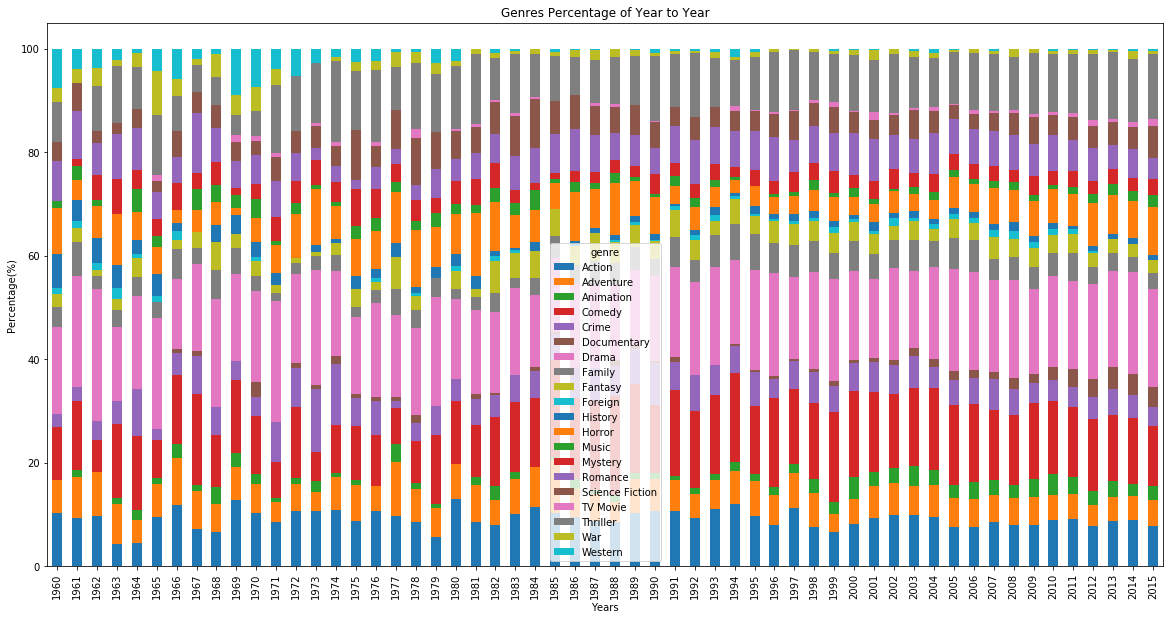

In [42]:
#make a subplot which shows the percentage of genres year to year 
f,ax=plt.subplots(figsize=(20, 10))
df_1.unstack().plot(kind='bar',  stacked=True,ax=ax)

ax.set(xlabel = 'Years', ylabel = 'Percentage(%)', title = 'Genres Percentage of Year to Year')
plt.show()

- It is seen in the graphic above that Western movies have decreased especially after the 1980s.
- Drama is the most popular genre, following action, comedy, and thriller.
- It is seen that Documentaries have increased in recent years.
- Tv movies have a really low percentage but especially it is seen that this type of movies are increasing after 1994.
- Drama, Action, Comedy, Adventure, and Thriller are always the most popular movie types.
- Science Fiction movies have nearly a stable percentage.

### 2. Which movies have the highest and lowest net profit?

I decided to write a function to find min and max values. Thus, I can use the function to answer more than one questions.

In [43]:
#a function to find min and max value
def find_max_min(column):
    max_budget = df_new[column].idxmax()     #find max value
    max_details = pd.DataFrame(df_new.loc[max_budget])
    
    min_budget = df_new[column].idxmin()     #find min value
    min_details = pd.DataFrame(df_new.loc[min_budget])
    
    final_table=pd.concat([max_details, min_details], axis=1)  #concatinate two movies informations
    
    return final_table

find_max_min('net_profit')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
net_profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


Text(0.5, 0, 'Amount of Net Profit')

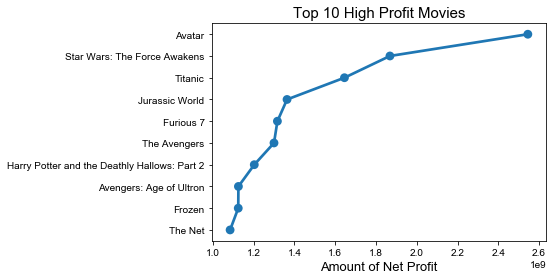

In [44]:
#make a plot which contain top 10 movies which have high net profit.
#firstly, sort net profit 
top_10_profit = pd.DataFrame(df_new['net_profit'].sort_values(ascending = False))
top_10_profit['original_title'] = df_new['original_title']
df_profit_list = list(map(str,(top_10_profit['original_title'])))

#take the first 10 value
x = list(df_profit_list[:10])
y = list(top_10_profit['net_profit'][:10])

#use pointplot for the top 10 high net profit movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})

#setup the title and labels of the plot.
ax.set_title("Top 10 High Profit Movies",fontsize = 15)
ax.set_xlabel("Amount of Net Profit",fontsize = 13)

### 3. Which movies have the highest and lowest budget? 

I want to see which movies have the highest and lowest budget. There is a function below to find the highest and lowest budget and printing their information.

In [45]:
#find movies which have the highest and lowest budget
find_max_min('budget') 

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
net_profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95


##### Top 10 movies which have the highest budget

In [46]:
#find top 10 list for highest budget
df_new.nlargest(10, 'budget') 

,id,popularity,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
2244,46528,0.250540,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010
3375,1865,4.955130,380000000,1021683000,641683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136.0,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011
7387,285,4.965391,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,ocean|drug abuse|exotic island|east india trad...,169.0,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007
14,99861,5.944927,280000000,1405035767,1125035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141.0,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015
6570,1452,1.957331,270000000,391081192,121081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,saving the world|dc comics|invulnerability|seq...,154.0,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006
1929,38757,2.865684,260000000,591794936,331794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,hostage|horse|fairy tale|musical|princess,100.0,Animation|Family,2010-11-24,2019,7.3,2010
4411,49529,1.588457,260000000,284139100,24139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,based on novel|mars|medaillon|cave|future,132.0,Action|Adventure|Fantasy|Science Fiction,2012-03-07,1479,6.0,2012
7394,559,2.520912,258000000,890871626,632871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,dual identity|amnesia|sandstorm|love of one's ...,139.0,Fantasy|Action|Adventure,2007-05-01,2083,5.8,2007
5508,57201,1.214510,255000000,89289910,-165710090,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,texas|horse|survivor|texas ranger|partner,149.0,Action|Adventure|Western,2013-07-03,1607,6.0,2013
634,122917,10.174599,250000000,955119788,705119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,corruption|elves|dwarves|orcs|middle-earth (to...,144.0,Adventure|Fantasy,2014-12-10,3110,7.1,2014


Text(0.5, 0, 'Amount of Budget')

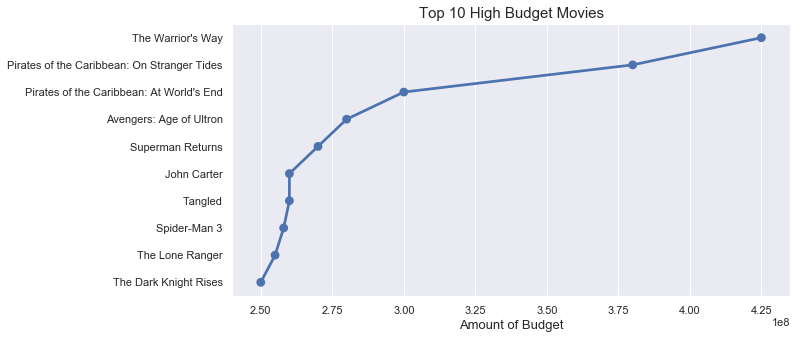

In [47]:
#make a plot which contain top 10 movies which have high budget.
#sort budget 
top_10 = pd.DataFrame(df_new['budget'].sort_values(ascending = False))
top_10['original_title'] = df_new['original_title']
df_budget_list = list(map(str,(top_10['original_title'])))

#take the first 10 value
x = list(df_budget_list[:10])
y = list(top_10['budget'][:10])

#use pointplot for the top 10 high budget movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})

#setup the title and labels of the plot.
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Amount of Budget",fontsize = 13)


### 4. Which movies had voted by the highest and the lowest count of people?

I have already written a function to find maximum and minimum value in columns. Now, I will use the same function to answer this question.

In [48]:
#find min and max vote count
find_max_min('vote_count')

,1919,1818
id,27205,21033
popularity,9.36364,0.159638
budget,160000000,1500000
revenue,825500000,56000
net_profit,665500000,-1444000
original_title,Inception,Beautiful
cast,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Deborra-Lee Furness|Peta Wilson|Aaron Jeffery|...
director,Christopher Nolan,Dean O'Flaherty
keywords,loss of lover|dream|sleep|subconsciousness|heist,suspense
runtime,148,97


While Inception got 9767 votes, it was seen that Beautiful got 10 votes.

### 5. Which genres are the most popular?

In [49]:
#genres column has multiple value separeted by '|' characters. 
#find the answer I should split values for genres column

df_genre = df  #copying original dataframe to a new dataframe

#split genres column
df_genre['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [50]:
#confirm the action worked and genres column splitted 
df_genre.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [51]:
# Check new row count
df_genre.shape

(10731, 15)

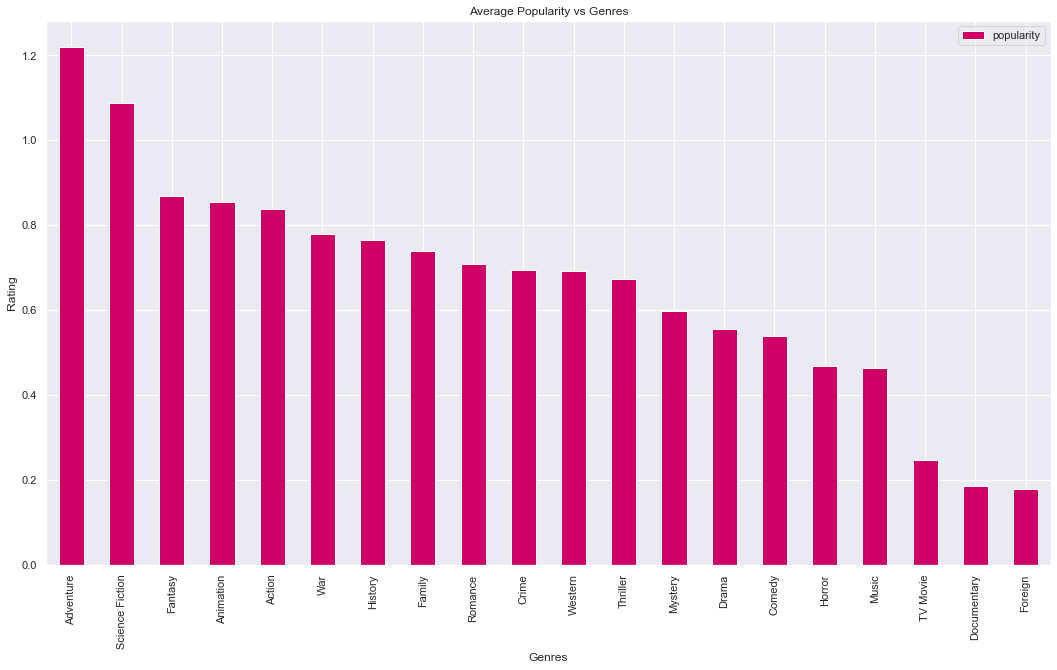

In [52]:
#make a subplot which contain popularity of each genre type
f,ax=plt.subplots(figsize=(18, 10))
df_genre[['genres', 'popularity']].groupby(['genres']).mean().sort_values(["popularity"], ascending=False).plot(kind="bar",color = '#CC0066',  ax=ax);

#set title and label names
ax.set(xlabel = 'Genres', ylabel = 'Rating', title = 'Average Popularity vs Genres')
plt.show()

### 6. What is the correlation between popularity and vote count columns?

In [53]:
#find correlation between popularity and vote count 
col_1 = df["popularity"]
col_2 = df["vote_count"]
corr_1 = col_1.corr(col_2)

print("Correlation Between Popularity And Vote Count : ", corr_1)


Correlation Between Popularity And Vote Count :  0.8006187445347117


There is a **positive correlation** between **popularity** and **vote_count** columns. This mean they have a relationship in the same direction. When popularity variable decreases as the vote_count variable decreases, or popularity variable increases while the vote_count increases.

Text(0, 0.5, 'Vote Count')

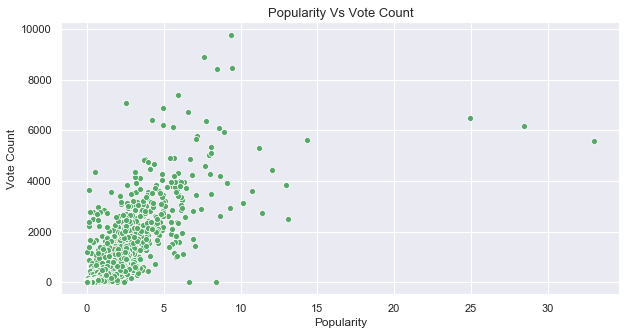

In [54]:
#scatter plot, it shows correlation between popularity and vote count columns
ax = sns.scatterplot(x = df["popularity"], y = df["vote_count"], color = 'g')

#setup the title and the labels name
ax.set_title("Popularity Vs Vote Count",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Vote Count",fontsize=12)

### 7. Which genres have high budget and revenue?

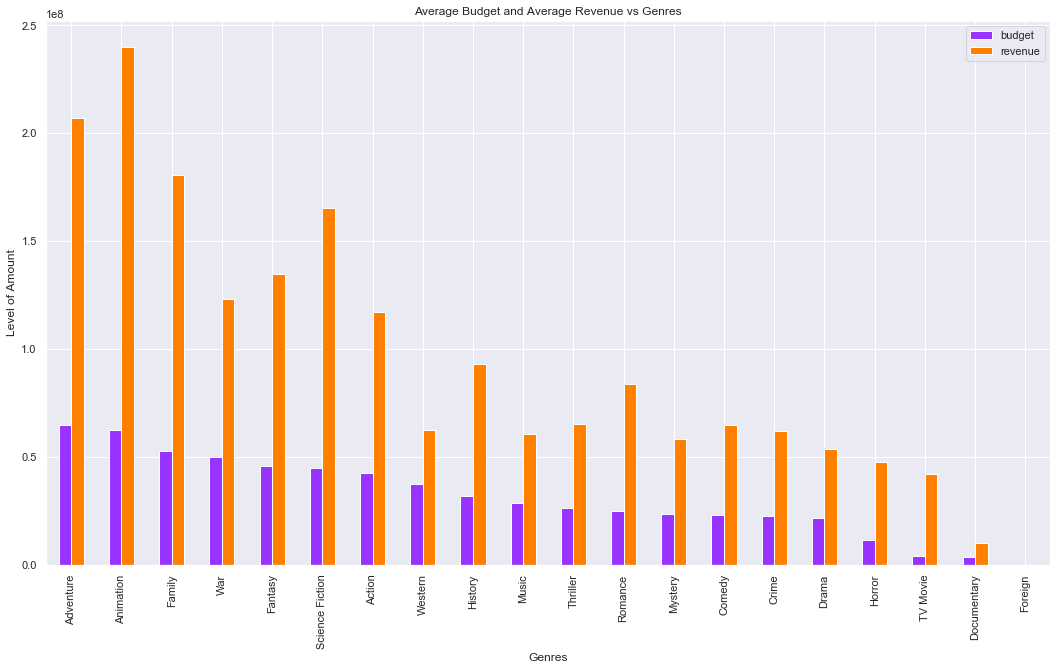

In [55]:
# average budget and revenue of each genres' movies
f,ax=plt.subplots(figsize=(18, 10))
df_genre[['genres', 'budget', 'revenue']].groupby(['genres']).mean().sort_values(["budget","revenue"], ascending=False).plot(kind="bar",color = ['#9933FF','#FF8000'],  ax=ax);

#giving names for x label, y label and chart
ax.set(xlabel= 'Genres', ylabel = 'Level of Amount', title = 'Average Budget and Average Revenue vs Genres')
plt.show()


### 8. What is the correlation between revenue and budget?

In [56]:
#find correlation between revenue and budget 
#I use df_new because it has copy dataframe which do not have null value.
col_3 = df_new["revenue"]
col_4 = df_new["budget"]
corr_2 = col_3.corr(col_4)

print("Correlation Between Revenue And Budget : ", corr_2)

Correlation Between Revenue And Budget :  0.6871459237737454


There is a **positive correlation** between **revenue** and **budget** columns. This mean they have a relationship in the same direction. 

Text(0, 0.5, 'Revenue')

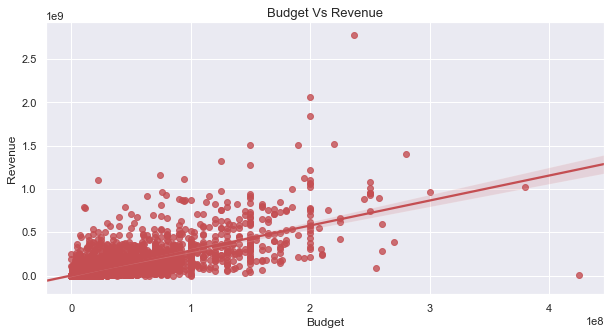

In [57]:
#make regplot which shows correlation between revenue and budget
ax = sns.regplot(x=df_new['budget'], y=df_new['revenue'],color='r')

#setup the title and the labels name
ax.set_title("Budget Vs Revenue",fontsize=13)
ax.set_xlabel("Budget",fontsize=12)
ax.set_ylabel("Revenue",fontsize=12)

### 9. Which genres have the highest runtime duration?

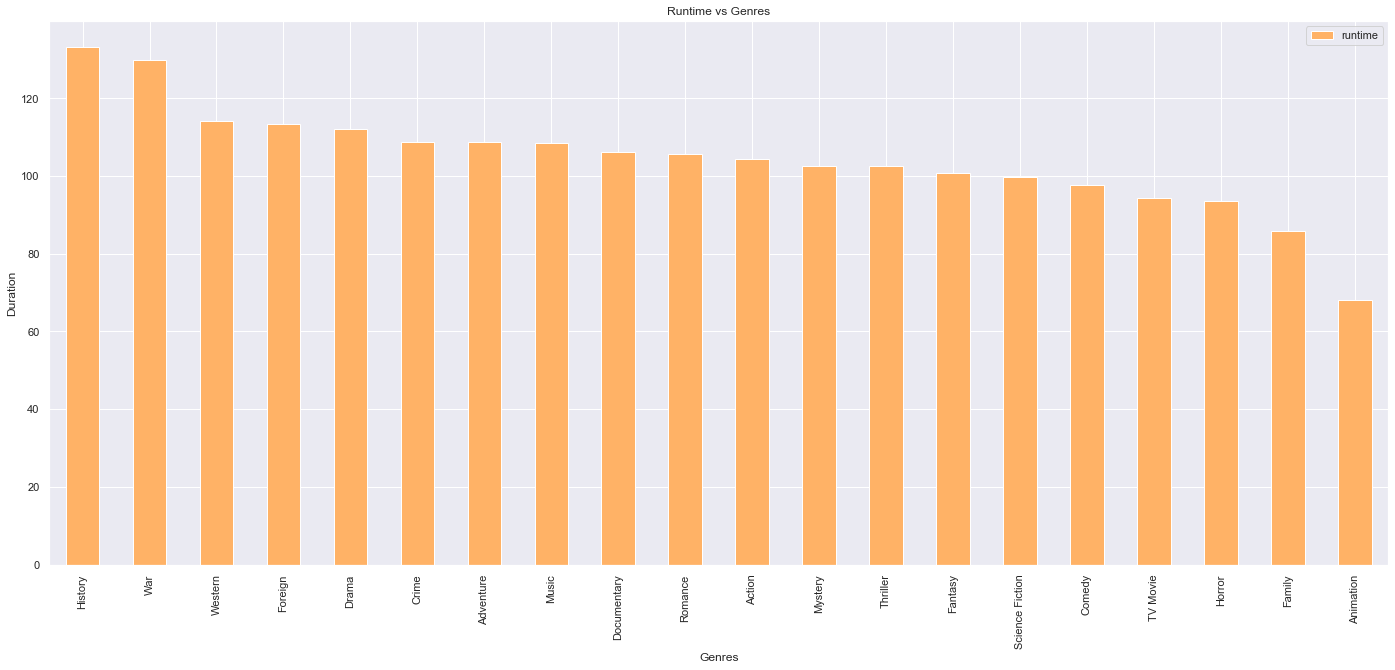

In [58]:
# average runtime for each genre
f,ax=plt.subplots(figsize=(24, 10))
df_genre[['genres', 'runtime']].groupby(['genres']).mean().sort_values(["runtime"], ascending=False).plot(kind="bar",color = '#FFB266',  ax=ax);

#setup the title and the labels name
ax.set(xlabel = 'Genres', ylabel = 'Duration', title = 'Runtime vs Genres')
plt.show()

### 10. Which directors earned the highest revenue?

In [59]:
#control has the director column '|' characters?(Is it has the multiple value?)
df_new = df[df['director'].str.contains("\|")]
df_new.head()
#we can see some rows have multiple value in director column, we should split them

,id,popularity,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
8,211672,7.404165,74000000.0,1.156731e+09,1.082731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family,2015-06-17,2893,6.5,2015
11,76757,6.189369,176000003.0,1.839877e+08,7.987720e+06,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,jupiter|space|woman director|3d|interspecies r...,124.0,Science Fiction,2015-02-04,1937,5.2,2015
64,256591,2.395366,50100000.0,1.539630e+08,1.038630e+08,Focus,Will Smith|Margot Robbie|Rodrigo Santoro|Rober...,Glenn Ficarra|John Requa,seduction|con man|femme fatale|deception|con a...,105.0,Romance,2015-02-25,1831,6.7,2015
85,296099,2.000338,31000000.0,1.043842e+08,7.338419e+07,Vacation,Ed Helms|Christina Applegate|Skyler Gisondo|St...,John Francis Daley|Jonathan M. Goldstein,route 66|grand canyon|cow|vacation|road trip,99.0,Adventure,2015-07-28,846,6.1,2015
100,326359,1.724712,NaN,NaN,NaN,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,8.0,Adventure,2015-03-09,475,7.0,2015


In [60]:
#director column has multiple value separeted by '|' characters. 
#before find the answer,I should split values for director column

df_director = df.copy()  #copying original dataframe to a new dataframe

#split multiple values
df_director['director'] = df['director'].apply(lambda x: x.split("|")[0])

In [61]:
#confirm the action worked and director column splitted 
df_director.director.unique()

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object)

In [62]:
# Check new row count
df_director.shape

(10731, 15)

In [63]:
#check, Is there any record that has multiple values?
df_new_director = df[df_director['director'].str.contains("\|")]
df_new_director.head()

,id,popularity,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year


There is no row in the result, this means director column has not multiple value anymore.

In [64]:
#find the top 20 directors that earned high revenue
df_director_success = df_director.groupby(['director']).sum()['revenue']
df_director_success = pd.DataFrame(df_director_success)

In [65]:
df_director_success.head()

,revenue
director,
FrÃ©dÃ©ric Jardin,3358.0
A. Todd Smith,0.0
A.R. Murugadoss,76000000.0
Aaron Aites,0.0
Aaron Blaise,250.0


In [66]:
#Create new data frame for the total revenue for directors
df_director_success_total = df_director_success.groupby(['director']).sum()
df_director_success_total = pd.DataFrame(df_director_success_total)
df_director_success_total = df_director_success_total.sort_values(by = ['revenue'], ascending = False)


In [67]:
df_director_success_total.head()

,revenue
director,
Steven Spielberg,9.018564e+09
Peter Jackson,6.523245e+09
James Cameron,5.841895e+09
Michael Bay,4.917208e+09
Christopher Nolan,4.167549e+09


Text(0, 0.5, 'Amount of Revenue')

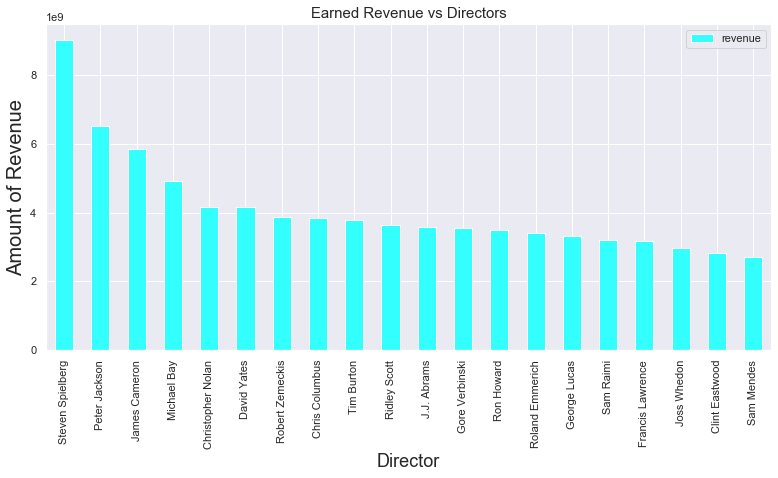

In [68]:
#make a bar chart for first 20 directors
df_director_success_total[:20].plot(kind = 'bar',color='#33FFFF', figsize=(13,6));

#setup the title and the labels name
plt.title("Earned Revenue vs Directors",fontsize=15)
plt.xlabel("Director",fontsize= 18)
plt.ylabel("Amount of Revenue",fontsize= 20)


It is seen in a graph above, Steven Spielberg was earned the highest revenue. I want to be sure the 'Earned Revenue vs Directors' graph is correct. Thus, I decided to compare the result of graph and data.

In [69]:
# sort data by revenue
df_high_revenue = df_director.sort_values(['release_year','revenue'], ascending=[True, False])

#after sort the data, group data year to year and take first 50 rows
df_high_revenue = df_high_revenue.groupby('release_year').head(50).reset_index(drop=True)

#check data 
df_high_revenue.head(2)

,id,popularity,budget,revenue,net_profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,967,1.136943,12000000.0,60000000.0,48000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197.0,Action,2060-10-06,211,6.9,1960
1,539,2.610362,806948.0,32000000.0,31193052.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109.0,Drama,2060-08-14,1180,8.0,1960


In [70]:
#checking total revenue for bar chart that is above
total = df_high_revenue.query('director == "Steven Spielberg"').sort_values(["revenue"], ascending=False)
total.revenue.sum()

9018563772.0

The graph is consistent with the total revenue calculated above.

### 11. What is the correlation between all numeric values in data frame?

In [71]:
#find correlation for all numeric values in dataframe
corr = df_new.corr()
print(corr)

                    id  popularity    budget   revenue  net_profit   runtime  \
id            1.000000   -0.091393 -0.125062 -0.062805    0.020699  0.077504   
popularity   -0.091393    1.000000  0.528191  0.647096    0.597413  0.018671   
budget       -0.125062    0.528191  1.000000  0.671578    0.522280  0.109717   
revenue      -0.062805    0.647096  0.671578  1.000000    0.982601  0.005947   
net_profit    0.020699    0.597413  0.522280  0.982601    1.000000 -0.009250   
runtime       0.077504    0.018671  0.109717  0.005947   -0.009250  1.000000   
vote_count   -0.102122    0.849704  0.574552  0.786718    0.755546  0.036576   
vote_average -0.015391    0.196537  0.216426  0.316114    0.369071  0.079550   
release_year  0.490389    0.035814  0.189301  0.114873    0.132930 -0.046567   

              vote_count  vote_average  release_year  
id             -0.102122     -0.015391      0.490389  
popularity      0.849704      0.196537      0.035814  
budget          0.574552      0.21

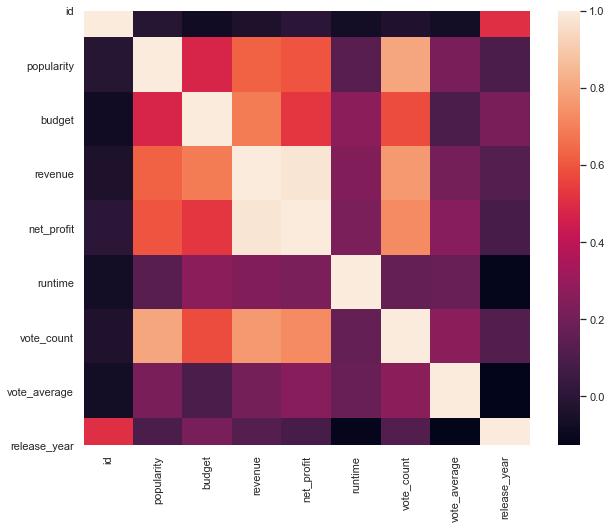

In [72]:
#correlation plot 
plt.figure(figsize= (10, 8))
sns.heatmap(df.corr())

The plot above shows the relationship between the independent variables. The differing colors represent the relationship between the variables. The darker the color gets, the more negative linear relationship exists between the variables.

<a id='conclusions'></a>
## Conclusions

1. First of all, I decided to find distribution between all genres year to year. Thus, I can see which genre is the most popular, what types of genre increase in recent years or which genre do not prefer by people, etc.
2. Drama is the most popular genre, following action, comedy, and thriller.
3. It is seen that Documentaries have increased in recent years.
4. Adventure and Science Fiction are seen as the most popular movies.
5. Popularity and Vote count columns have a relationship in the same direction.
6. Animation movies have the highest revenue, following by adventure, family and science fiction.
7. Revenue and Budget columns have a relationship in the same direction.
8. History and War movies generally have the longest runtime and Animation types of movies have the shortest runtime.
9. Steven Spielberg is the most profitable director.

## Limitations

1. In the data cleaning process, I did not drop the null values in revenue and budget columns. Because I thought zero value does not exactly show this data have problems. Afterward, I wanted to do some analysis using these columns and I needed to change their data types. I created a new data frame from the original and cleaned data frame. After that, I dropped null values in the budget, revenue, net profit columns and did some analysis using these columns.

## References

- https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
- https://stackoverflow.com/
- http://benalexkeen.com/correlation-in-python/
- http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
- https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf
- https://www.udacity.com/course/data-analyst-nanodegree

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project 2 - Investigating TMDb Movie Dataset.ipynb'])

0